In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
%matplotlib inline
import numpy as np

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### Data Extraction

In [2]:
data=pd.read_csv("Data/diabetesdata.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data Visualization

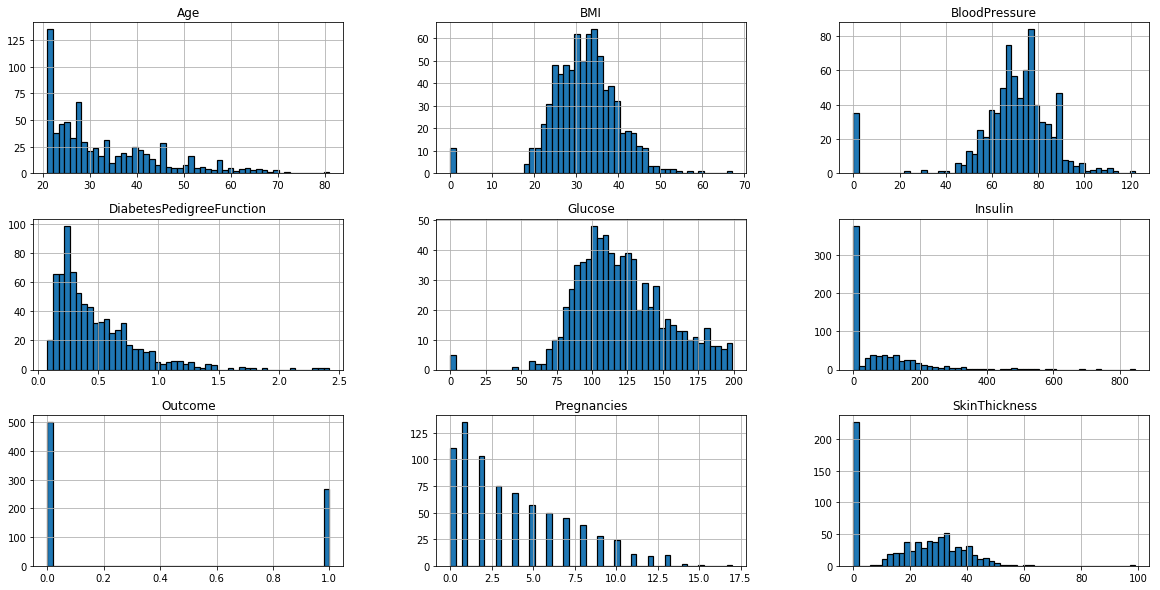

In [5]:
data.hist(bins=50,edgecolor='black',figsize=(20,15), linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,10)

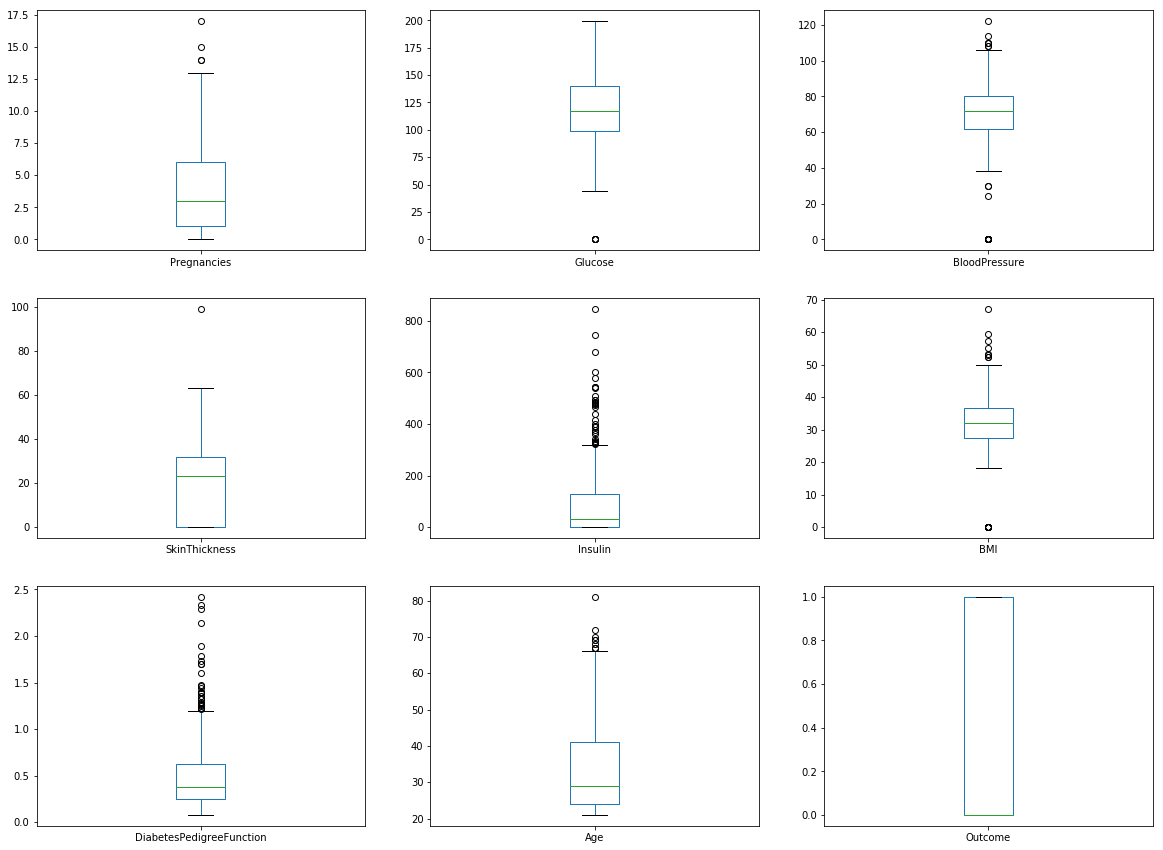

In [6]:
data.plot(kind='box',figsize=(20,15),subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

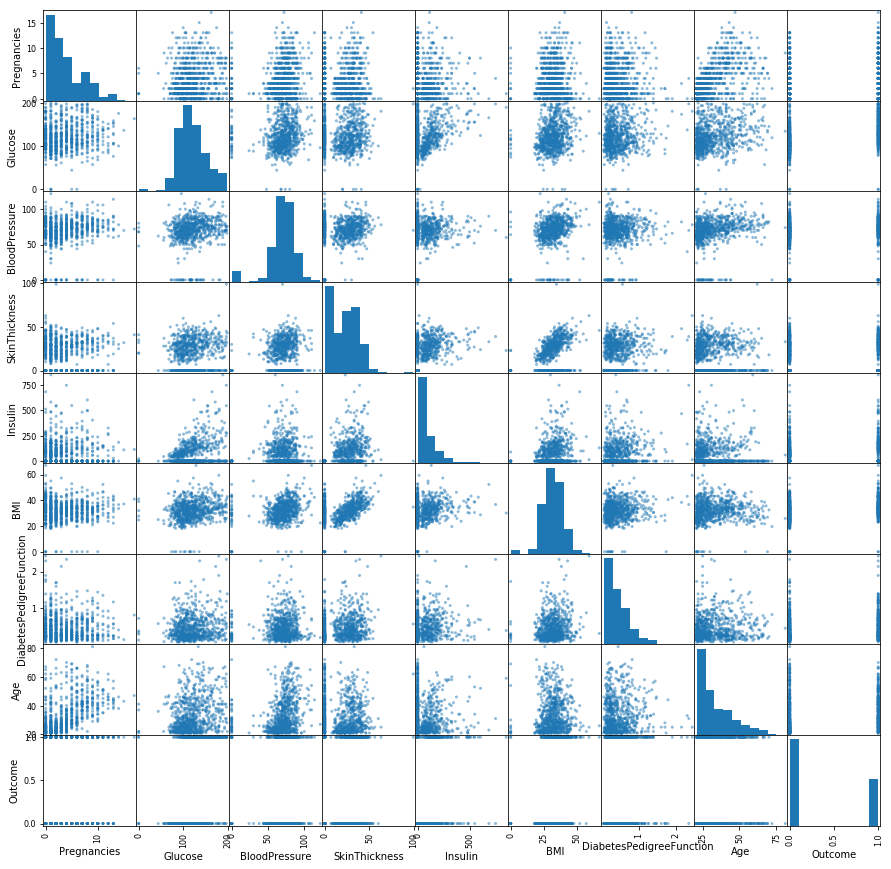

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(15,15))
plt.show()

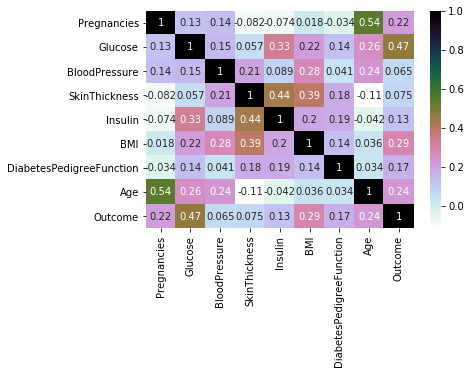

In [8]:
import seaborn as sns
sns.heatmap(data.corr(), annot = True,cmap='cubehelix_r')
plt.show()

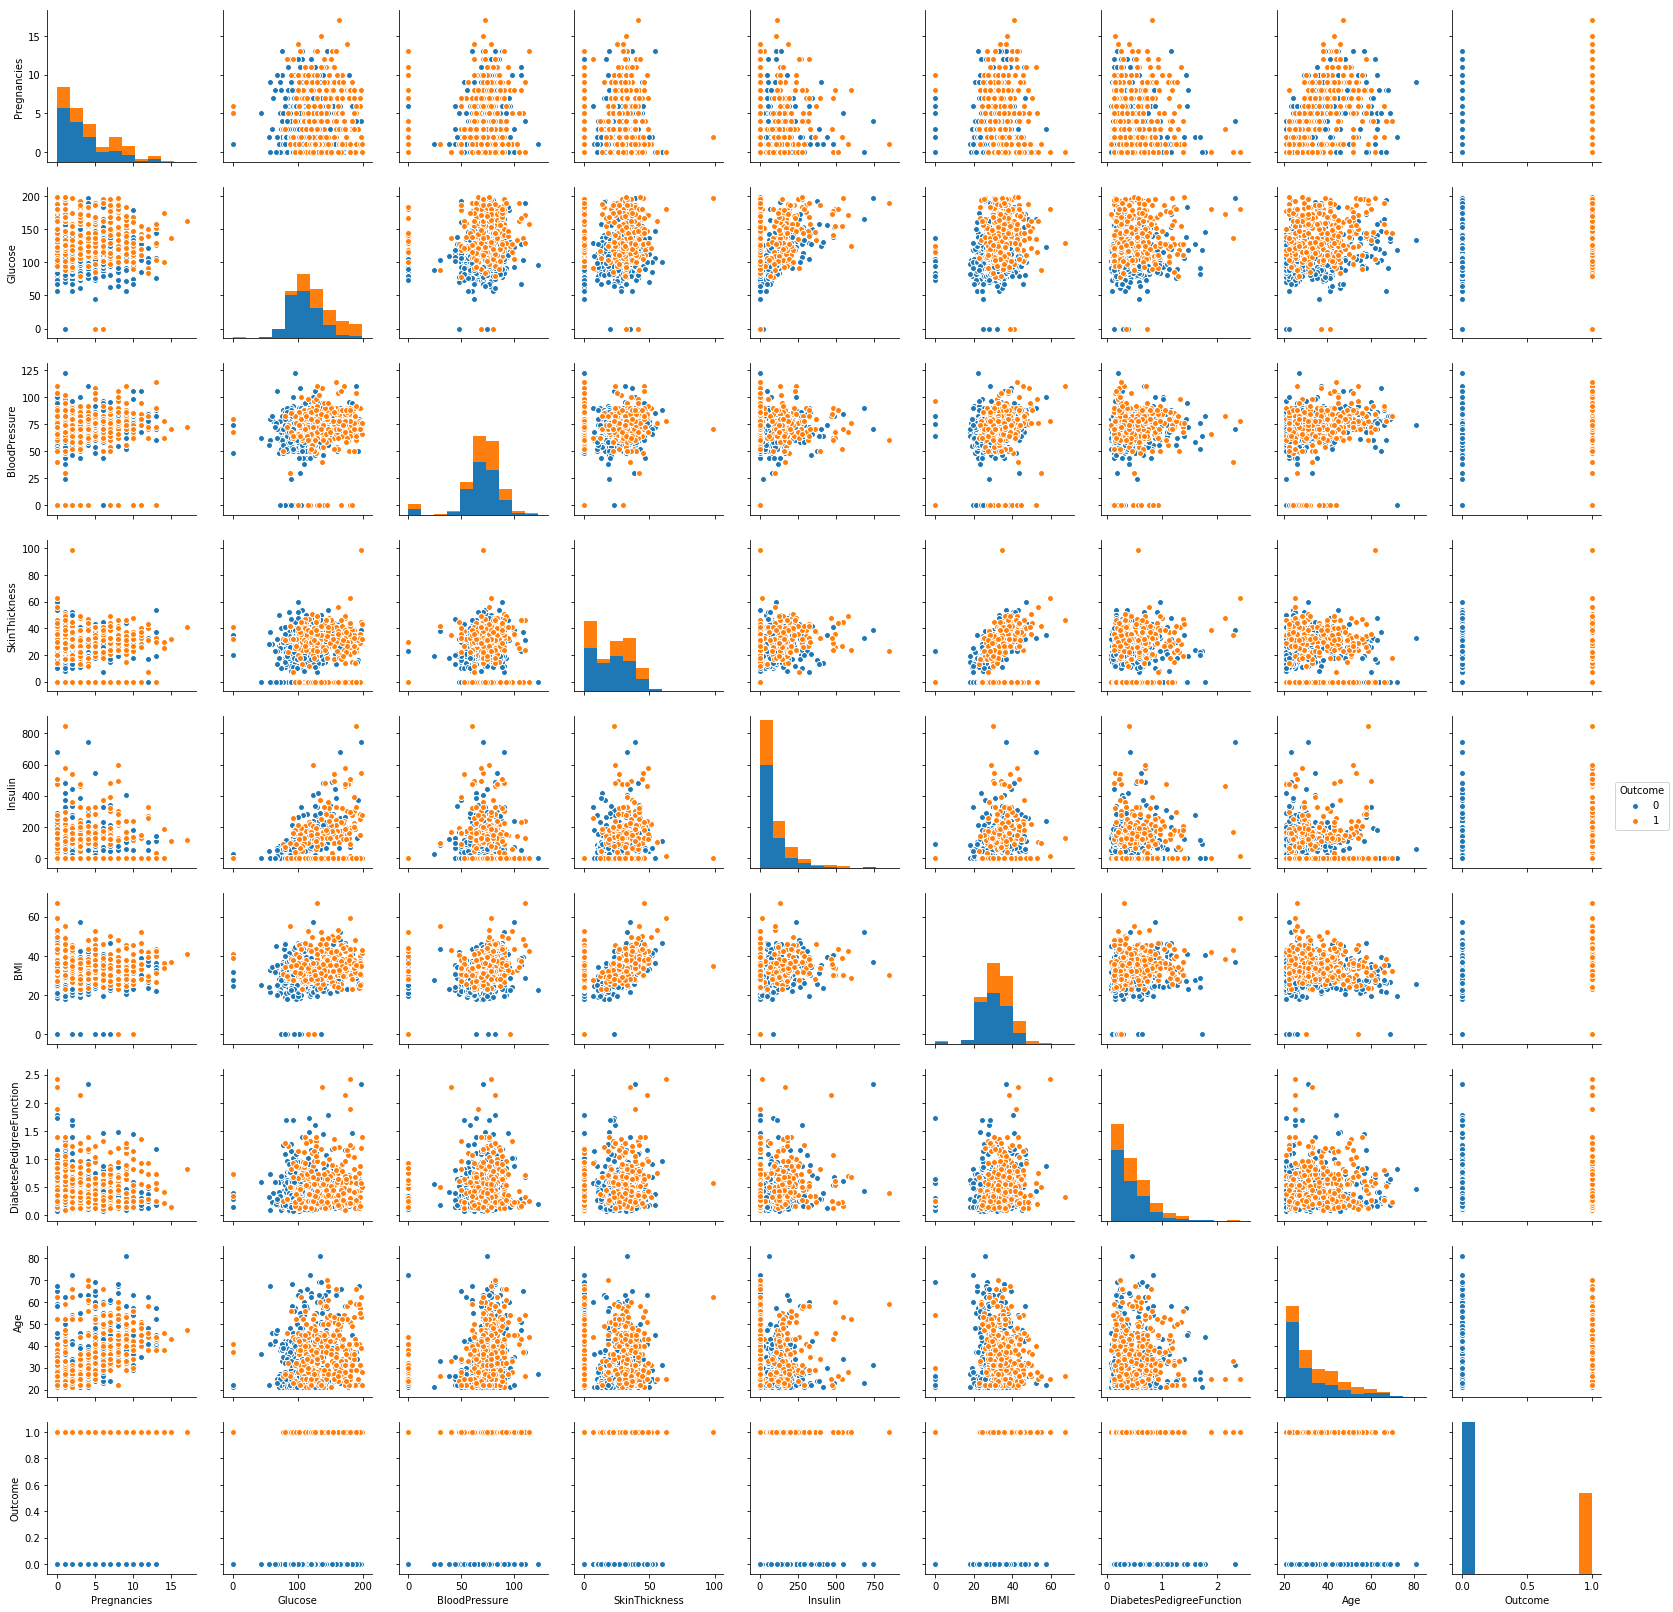

In [9]:
sns.pairplot(data=data,hue='Outcome')
plt.show()

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We see a lot of zero values that cant possibly be in that column and thus we find certain missing values which wasnt obvious in the beigning and therefore we need to Impute or remove rows with missing values

### Predective Modeling

In [12]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
train,test=train_test_split(data,test_size=0.25,random_state=0)
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [55]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.750000
Radial Svm,0.760417
Logistic Regression,0.765625
KNN,0.708333
Decision Tree,0.687500


### Data Cleaning and Transformation

Missing Values Imputation

In [15]:
(data == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Here the column Pregnancies could be zero as it contain the no of tinmes the patient has been pregnant.
Other than this all the other columns have an invalid minimum zero value

In [16]:
#marking missing values with NaN
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [17]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Now we can either remove these missing values using data.dropna(inplace=True)<br> but would cut our data every much and thus we need to impute our missing data with correct values 

Any imputing performed on the training dataset will have to be performed on new data in the future when predictions are needed from the finalized model. This needs to be taken into consideration when choosing how to impute the missing values.

In [18]:
# fill missing values with mean column values
data.fillna(data.mean(), inplace=True)
# count the number of NaN values in each column
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [19]:
train,test=train_test_split(data,test_size=0.25,random_state=0)
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [60]:
abc2=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc2.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe['Accuracy2'] = abc2
models_dataframe

,Accuracy,Accuracy2
Linear Svm,0.750000,0.750000
Radial Svm,0.760417,0.760417
Logistic Regression,0.765625,0.765625
KNN,0.708333,0.708333
Decision Tree,0.687500,0.713542


Feature Scaling/Stratification

In [26]:
from sklearn.preprocessing import MinMaxScaler as Scaler
train,test=train_test_split(data,test_size=0.25,random_state=0,stratify=data['Outcome'])
scaler=Scaler()
scaler.fit(train)
train_scaled=scaler.transform(train)
test_scaled=scaler.transform(test)

In [31]:
train_X=train_scaled[:,:8]
test_X=test_scaled[:,:8]
train_Y=train_scaled[:,-1]
test_Y=test_scaled[:,-1]

In [61]:
abc3=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc3.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe['Accuracy3'] = abc3
models_dataframe

,Accuracy,Accuracy2,Accuracy3
Linear Svm,0.750000,0.750000,0.750000
Radial Svm,0.760417,0.760417,0.760417
Logistic Regression,0.765625,0.765625,0.765625
KNN,0.708333,0.708333,0.708333
Decision Tree,0.687500,0.713542,0.703125


Feature Extraction/Selection

All the features look to be uncorrelated. So we cannot eliminate any features just by looking at the correlation matrix.

We can Use Random Forest Classifier to get a list of important features

In [33]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=data[data.columns[:8]]
Y=data['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.248729
BMI                         0.159638
Age                         0.138696
DiabetesPedigreeFunction    0.124043
Insulin                     0.087283
BloodPressure               0.083626
Pregnancies                 0.079787
SkinThickness               0.078197
dtype: float64

In [34]:
data2=data[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
from sklearn.preprocessing import StandardScaler #Standardisation
features=data2[data2.columns[:4]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
x=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])
x['Outcome']=data2['Outcome']
outcome=x['Outcome']
train1,test1=train_test_split(x,test_size=0.25,random_state=0,stratify=x['Outcome'])
train_X1=train1[train1.columns[:4]]
test_X1=test1[test1.columns[:4]]
train_Y1=train1['Outcome']
test_Y1=test1['Outcome']

In [62]:
abc4=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc4.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe['Accuracy4'] = abc4
models_dataframe

,Accuracy,Accuracy2,Accuracy3,Accuracy4
Linear Svm,0.750000,0.750000,0.750000,0.750000
Radial Svm,0.760417,0.760417,0.760417,0.760417
Logistic Regression,0.765625,0.765625,0.765625,0.765625
KNN,0.708333,0.708333,0.708333,0.708333
Decision Tree,0.687500,0.713542,0.703125,0.703125


<h1>Cross Validation</h1>
<br>Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.
<br>1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.
<br>2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.
<br>3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.
<br>This is called K-Fold Cross Validation.
<br>4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [64]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation


In [65]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

In [72]:
xyz=[]
Accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,x[x.columns[:4]],x['Outcome'], cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    Accuracy.append(cv_result)
models_dataframe['AccuracyCV'] = xyz
models_dataframe  

,Accuracy,Accuracy2,Accuracy3,Accuracy4,AccuracyCV
Linear Svm,0.750000,0.750000,0.750000,0.750000,0.769498
Radial Svm,0.760417,0.760417,0.760417,0.760417,0.772129
Logistic Regression,0.765625,0.765625,0.765625,0.765625,0.774710
KNN,0.708333,0.708333,0.708333,0.708333,0.731852
Decision Tree,0.687500,0.713542,0.703125,0.703125,0.697813


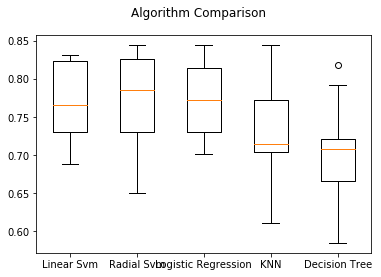

In [78]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(Accuracy)
ax.set_xticklabels(classifiers)
plt.show()

SVM and LR perform the best while Decision Tree performs the worst.

<h1>Ensembling</h1>
<br>
Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would. The models used to create such ensemble models are called ‘base models’.

We will do ensembling with the Voting Ensemble. Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

We will be using weighted Voting Classifier. We will assign to the classifiers according to their accuracies. So the classifier with single accuracy will be assigned the highest weight and so on.

In our case, we will use the Top 3 classifiers i.e Linaer SVM, Radial(rbf) SVM and Logistic Regression classifiers.

In [79]:
linear_svc=svm.SVC(kernel='linear',C=0.1,gamma=10,probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10,probability=True)
lr=LogisticRegression(C=0.1)

In [80]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier

In [82]:
ensemble_lin_rbf=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Radial_svm', radial_svm)], 
                       voting='soft', weights=[2,1]).fit(train_X1,train_Y1)
print('The accuracy for Linear and Radial SVM is:',ensemble_lin_rbf.score(test_X1,test_Y1))

The accuracy for Linear and Radial SVM is: 0.7760416666666666


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [83]:
ensemble_lin_lr=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Logistic Regression', lr)], 
                       voting='soft', weights=[2,1]).fit(train_X1,train_Y1)
print('The accuracy for Linear SVM and Logistic Regression is:',ensemble_lin_lr.score(test_X1,test_Y1))

The accuracy for Linear SVM and Logistic Regression is: 0.78125


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [84]:
ensemble_rad_lr=VotingClassifier(estimators=[('Radial_svm', radial_svm), ('Logistic Regression', lr)], 
                       voting='soft', weights=[1,2]).fit(train_X1,train_Y1)
print('The accuracy for Radial SVM and Logistic Regression is:',ensemble_rad_lr.score(test_X1,test_Y1))

The accuracy for Radial SVM and Logistic Regression is: 0.78125


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [85]:
ensemble_rad_lr_lin=VotingClassifier(estimators=[('Radial_svm', radial_svm), ('Logistic Regression', lr),('Linear_svm',linear_svc)], 
                       voting='soft', weights=[2,1,3]).fit(train_X1,train_Y1)
print('The ensembled model with all the 3 classifiers is:',ensemble_rad_lr_lin.score(test_X1,test_Y1))

The ensembled model with all the 3 classifiers is: 0.78125


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
